In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import auc

In [7]:
df = pd.read_csv('datasource_updated.csv')
# greenpp 人均绿地面积--死亡率
# green_area_hectare // death_persons
# population
# greenAreaPersons = green_area_hectare/population -- green_area_hectare;population
# 数据 清理 + 死亡率计算
df['green_pp'] = (df.green_area_hectare/df.population.str.replace(',','').astype(float))
#df['green_pp'].plot(kind='hist', bins=20, edgecolor='black')

# deathRate = numDeath/population -- death_persons;population
# 数据 清理 + 死亡率计算
df['deathRate'] = (df.death_persons.str.replace(',', '').astype(float)/df.population.str.replace(',','').astype(float))*100

### Green space pp

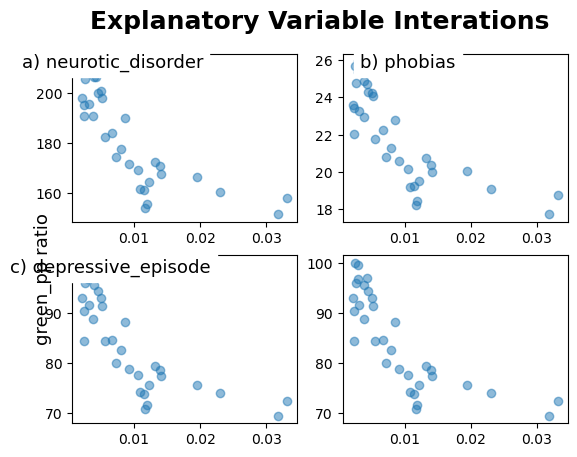

In [6]:
# "any_neurotic_disorder_per1000", "all_phobias_per1000", "depressive_episode_per1000","mixed_anxiety_depression"
#  “death_persons”, “overweight”, life_expectancy_65_males', 'life_expectancy_65_females',
# green_pp , accessibility 

fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0,0].scatter(x=df['green_pp'], 
            y=df['any_neurotic_disorder_per1000'],
            alpha = 0.5)
axs[0,0].set_title("a) neurotic_disorder", y=0.87, x=0.18, backgroundcolor = "white", fontsize=13)


axs[0,1].scatter(x=df['green_pp'], 
            y=df['all_phobias_per1000'],
            alpha = 0.5)
axs[0,1].set_title("b) phobias", y=0.87, x=0.29, backgroundcolor = "white", fontsize=13)


axs[1,0].scatter(x=df['green_pp'], 
            y=df['mixed_anxiety_depression'],
            alpha = 0.5)
axs[1,0].set_title("c) depressive_episode", y=0.85, x=0.17, backgroundcolor = "white", fontsize=13)

axs[1,1].scatter(x=df['green_pp'], 
            y=df['mixed_anxiety_depression'],
            alpha = 0.5)
axs[1, 1].set_title('picture4')



plt.title("Explanatory Variable Interations", fontweight="bold", y=2.3,x=-0.1, fontsize=18)
plt.suptitle("green_pp ratio", rotation=90, y=0.55, x=0.08, fontsize=13)


plt.show()

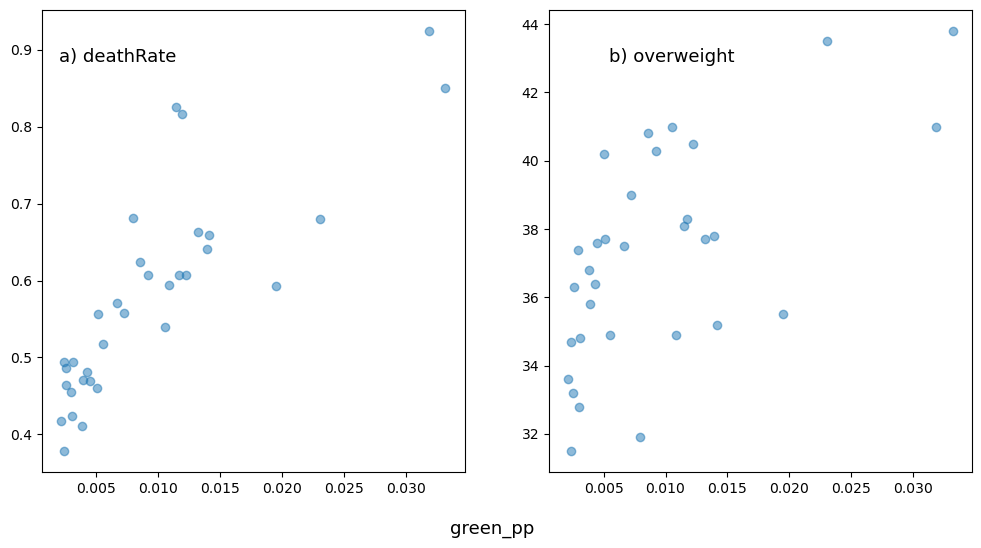

In [8]:
#  “deathRate”, “overweight”, life_expectancy_65_males', 'life_expectancy_65_females',
# green_pp

fig, axs = plt.subplots(1, 2, figsize=(12,6))

axs[0].scatter(x=df['green_pp'], 
            y=df['deathRate'],
            alpha = 0.5)
axs[0].set_title("a) deathRate", y=0.87, x=0.18, backgroundcolor = "white", fontsize=13)


axs[1].scatter(x=df['green_pp'], 
            y=df['overweight'],
            alpha = 0.5)
axs[1].set_title("b) overweight", y=0.87, x=0.29, backgroundcolor = "white", fontsize=13)

plt.suptitle("green_pp", rotation=0, y=0.03, x=0.5, fontsize=13)
plt.show()

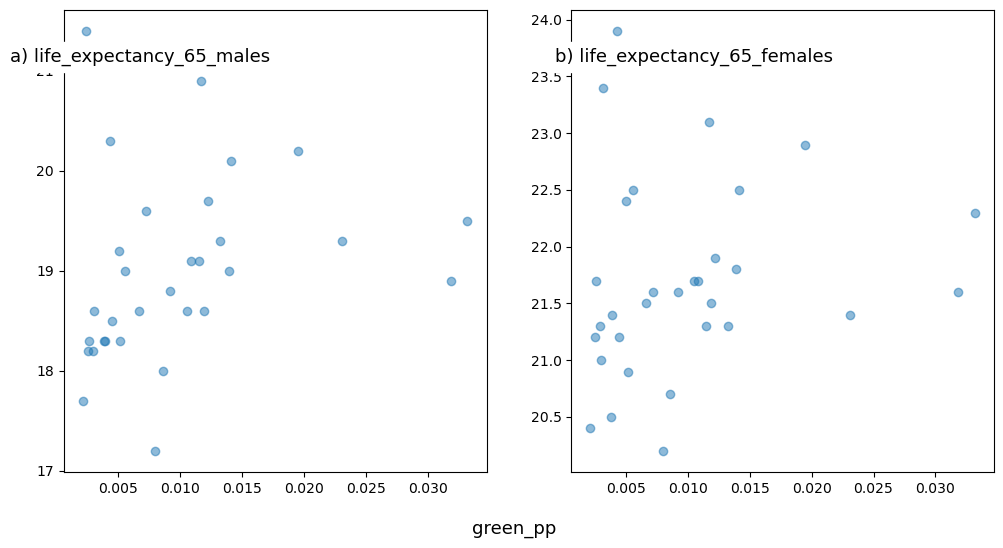

In [9]:
#  “deathRate”, “overweight”, life_expectancy_65_males', 'life_expectancy_65_females',
# green_pp

fig, axs = plt.subplots(1, 2, figsize=(12,6))

axs[0].scatter(x=df['green_pp'], 
            y=df['life_expectancy_65_males'],
            alpha = 0.5)
axs[0].set_title("a) life_expectancy_65_males", y=0.87, x=0.18, backgroundcolor = "white", fontsize=13)


axs[1].scatter(x=df['green_pp'], 
            y=df['life_expectancy_65_females'],
            alpha = 0.5)
axs[1].set_title("b) life_expectancy_65_females", y=0.87, x=0.29, backgroundcolor = "white", fontsize=13)

plt.suptitle("green_pp", rotation=0, y=0.03, x=0.5, fontsize=13)
plt.show()